# Trend changepoints

With the default settings, Prophet will place 25 potential changepoints, evenly spaced in 
the first 80% of the data, before determining their magnitudes. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [3]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/divvy_daily.csv'
df = pd.read_csv(URL)
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [4]:
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4)
model.fit(df)
forecast = model.predict()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       2713.43   0.000947721       208.954   1.023e-05       0.001      151  LS failed, Hessian reset 
      99       2714.49   0.000871608       65.5509      0.4647      0.4647      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       2715.54    0.00113776       271.667   1.057e-05       0.001      275  LS failed, Hessian reset 
     199       2716.32   2.23266e-07       77.7627      0.5169      0.5169      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       2716.32   2.38135e-06       85.0662   3.088e-08       0.001      403  LS failed, Hessian reset 
     222       2716.32   1.63079e-07        78.506      0.2943      0.9709      413   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

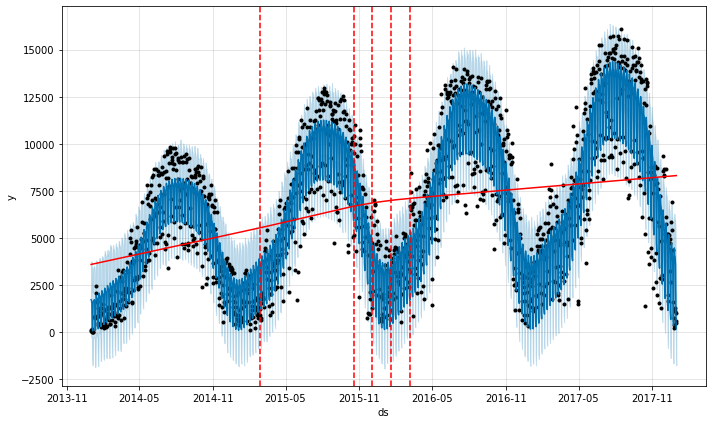

In [5]:
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [7]:
model.params['delta']

array([[ 1.34126256e-08, -3.05906558e-08, -1.97725314e-03,
        -9.05648593e-04, -2.02675112e-07,  2.59188687e-08,
         4.23068276e-08,  1.07217278e-07,  3.30174762e-02,
         1.39223477e-07,  1.00937618e-07, -5.10817382e-08,
        -9.23548005e-03, -9.44513407e-02, -8.65696867e-02,
        -5.75918812e-02, -3.69056540e-02, -8.65104032e-06,
         4.21050033e-09,  2.27048559e-08, -1.64132399e-08,
         1.14627937e-08,  2.49623288e-08,  2.41947705e-08,
        -5.60652723e-08]])

## Regularizing changepoints

In [17]:
# n_changepoints
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                n_changepoints=5)
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      33       2714.96   0.000513613       54.5665   3.514e-06       0.001       78  LS failed, Hessian reset 
      51       2716.53    0.00010408        22.072   2.159e-06       0.001      138  LS failed, Hessian reset 
      56       2716.54   2.27676e-05       48.7922   9.453e-07       0.001      185  LS failed, Hessian reset 
      60       2716.54   1.38117e-05       43.0597   4.836e-07       0.001      226  LS failed, Hessian reset 
      80       2716.54   1.70895e-07        32.876   0.0007779      0.7424      261   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


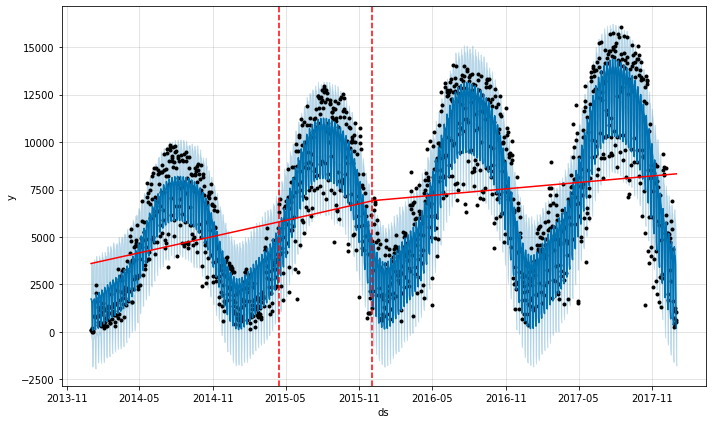

In [18]:
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [19]:
#  changepoint_range
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoint_range=.5)
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2713.22    0.00440196       227.213      0.2533      0.2533      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2716.35    0.00046273       67.8895      0.9968      0.9968      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       2716.37   1.93549e-05       90.6331   2.675e-07       0.001      392  LS failed, Hessian reset 
     298       2716.37   1.65432e-07       66.9244           1           1      431   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


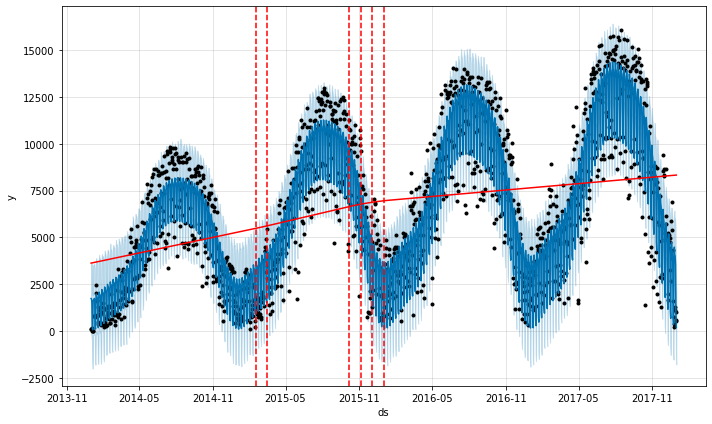

In [20]:
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

## Prior scales

By default, both `seasonality_prior_scale` and `holidays_prior_scale` were set to `10`. 

`changepoint_prior_scale`, however, is by default set to `0.05`. 

But just as with the seasonality and holidays prior scales, increasing this value will 
make the trend more flexible, and decreasing it will make the trend less flexible. 

Reasonable values are typically in the range of `0.001` to `0.5`.

In [10]:
# prior com muita flexibilidade (gerando ouverfitting)
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoint_prior_scale=1)
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2750.55     0.0149358       83.6407           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2759.69    0.00481644       41.6429      0.2679      0.2679      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2761.95     0.0162999       111.737       1.272      0.1272      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        2763.5    0.00295225       20.8744           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2764.09    0.00201327        14.082           1           1      587   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

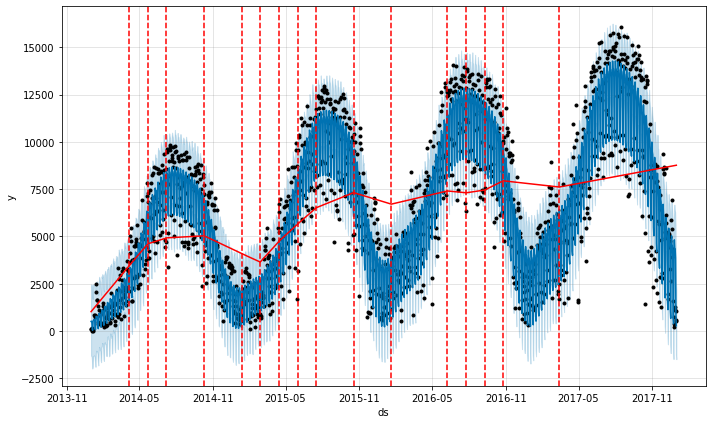

In [11]:
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [13]:
# prior com pouca flexibilidade 
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoint_prior_scale=.007)
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      60        2688.8    0.00155829       597.645   3.174e-06       0.001      121  LS failed, Hessian reset 
      99       2690.56   6.21963e-06       410.629      0.5525      0.5525      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       2690.75   8.05806e-05       551.469   1.555e-07       0.001      304  LS failed, Hessian reset 
     199       2690.79   2.55314e-06       562.915      0.3993      0.3993      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       2690.79    7.6776e-09        443.25       0.469       0.469      373   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


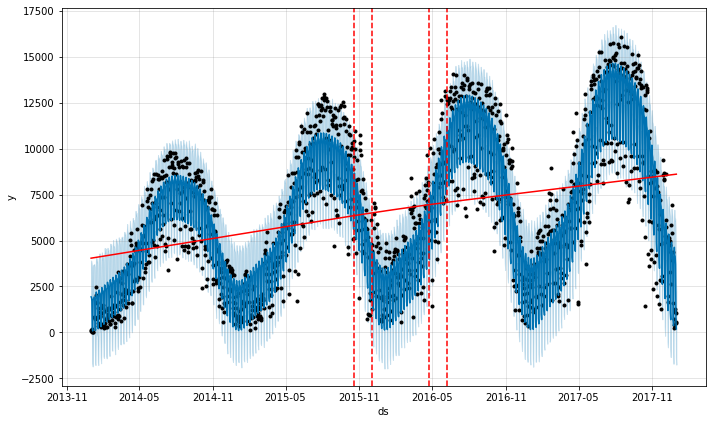

In [14]:
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()